In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# ----- Step 1: Data Preprocessing -----

In [2]:
# ----- Step 1: Data Preprocessing -----
IMG_SIZE = 224
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    'Dataset/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

Found 386 images belonging to 2 classes.


In [3]:
val_gen = datagen.flow_from_directory(
    'Dataset/test',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 24 images belonging to 2 classes.


# ----- Step 2: Model Building -----

In [4]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [6]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# ----- Step 3: Model Training -----

In [8]:
history = model.fit(train_gen, validation_data=val_gen,epochs=15)

Epoch 1/15
13/13 [==============================] - 22s 2s/step - loss: 0.1336 - accuracy: 0.9689 - val_loss: 0.1110 - val_accuracy: 0.9583
Epoch 2/15
13/13 [==============================] - 21s 2s/step - loss: 0.1249 - accuracy: 0.9715 - val_loss: 0.1203 - val_accuracy: 0.9583
Epoch 3/15
13/13 [==============================] - 21s 2s/step - loss: 0.1192 - accuracy: 0.9741 - val_loss: 0.1039 - val_accuracy: 0.9583
Epoch 4/15
13/13 [==============================] - 20s 2s/step - loss: 0.1142 - accuracy: 0.9715 - val_loss: 0.1064 - val_accuracy: 0.9583
Epoch 5/15
13/13 [==============================] - 21s 2s/step - loss: 0.1094 - accuracy: 0.9741 - val_loss: 0.1128 - val_accuracy: 0.9583
Epoch 6/15
13/13 [==============================] - 21s 2s/step - loss: 0.1040 - accuracy: 0.9741 - val_loss: 0.1038 - val_accuracy: 0.9583
Epoch 7/15
13/13 [==============================] - 20s 2s/step - loss: 0.1001 - accuracy: 0.9741 - val_loss: 0.1025 - val_accuracy: 0.9583
Epoch 8/15
13/13 [==

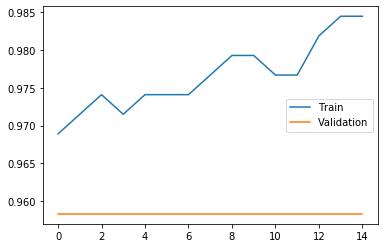

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', 'Validation'], loc='center right')
plt.show()

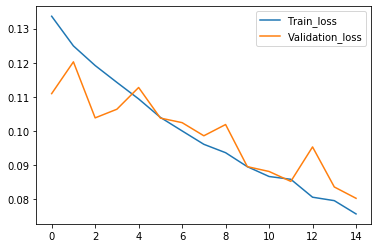

In [10]:
plt.plot(history.history['loss'], label="train_loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend(['Train_loss', 'Validation_loss'], loc='upper right')
plt.show()

In [11]:
test_loss, test_acc = model.evaluate(val_gen)
print("Test Accuracy:", test_acc)

1/1 [==============================] - 2s 2s/step - loss: 0.0803 - accuracy: 0.9583
Test Accuracy: 0.9583333134651184


In [12]:
predictions = model.predict(val_gen)
predictions

1/1 [==============================] - 3s 3s/step


array([[3.5107896e-02],
       [9.8656410e-01],
       [4.0335506e-03],
       [4.0269545e-01],
       [9.8060638e-01],
       [8.1321412e-01],
       [8.1857495e-02],
       [9.9358863e-01],
       [9.0382922e-01],
       [9.0356705e-05],
       [9.3866456e-01],
       [9.5566976e-01],
       [9.4702137e-01],
       [1.7526235e-02],
       [9.8841029e-01],
       [1.3643303e-02],
       [9.6886510e-01],
       [9.4342022e-04],
       [3.4455047e-03],
       [1.8450009e-02],
       [2.1247064e-01],
       [3.3375225e-03],
       [9.6008372e-01],
       [1.8085506e-03]], dtype=float32)

In [13]:
y_pred = (predictions > 0.5).astype(int)
y_true = val_gen.classes
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

# Print classification report

              precision    recall  f1-score   support

    Cataract       0.38      0.42      0.40        12
      Normal       0.36      0.33      0.35        12

    accuracy                           0.38        24
   macro avg       0.37      0.38      0.37        24
weighted avg       0.37      0.38      0.37        24



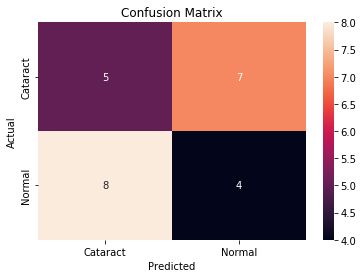

In [15]:
print(classification_report(y_true, y_pred, target_names=list(val_gen.class_indices.keys())))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=val_gen.class_indices.keys(), yticklabels=val_gen.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
model.save("Final_cataract_model.h5")
print("Model saved as Final_cataract_model.h5")

Model saved as Final_cataract_model.h5


In [17]:
# ----- Step 6: Load the Model -----
model = load_model("cataract_model.h5")

# ----- Step 7: Manual Testing -----
def predict_single_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)[0][0]
    label = "Normal" if pred > 0.5 else "Cataract"
    print(f"Prediction: {label} ({pred:.4f})")
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted: {label}")
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 38ms/step
Prediction: Cataract (0.0201)


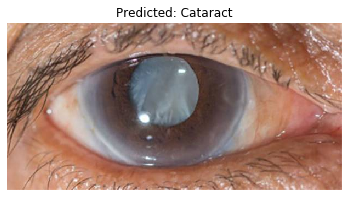

In [26]:
# Example: test on single image
predict_single_image(r"D:\MY_Project\Cataract_detection\Dataset\test\Cataract\image_300.png")

1/1 [==============================] - 0s 51ms/step
Prediction: Normal (0.7867)


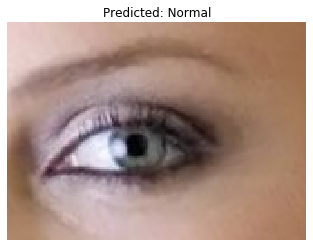

In [28]:
predict_single_image(r"D:\MY_Project\Cataract_detection\Dataset\test\Normal\image_279.png")